In [266]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [267]:
 df_ecom_train_ds = pd.read_csv('/Users/sinabhi2/hackathon/ecommerce_train.csv')

In [268]:
df_ecom_train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   session_id               40000 non-null  int64  
 1   administrative           40000 non-null  int64  
 2   administrative_duration  40000 non-null  float64
 3   informational            40000 non-null  int64  
 4   informational_duration   40000 non-null  float64
 5   productrelated           40000 non-null  int64  
 6   productrelated_duration  40000 non-null  float64
 7   bouncerates              40000 non-null  float64
 8   exitrates                40000 non-null  float64
 9   pagevalues               40000 non-null  float64
 10  specialday               40000 non-null  float64
 11  month                    40000 non-null  object 
 12  operatingsystems         40000 non-null  object 
 13  browser                  40000 non-null  object 
 14  region                

In [269]:
df_ecom_train_ds.set_index('session_id',inplace=True)

array([[<AxesSubplot:title={'center':'administrative'}>,
        <AxesSubplot:title={'center':'administrative_duration'}>,
        <AxesSubplot:title={'center':'informational'}>],
       [<AxesSubplot:title={'center':'informational_duration'}>,
        <AxesSubplot:title={'center':'productrelated'}>,
        <AxesSubplot:title={'center':'productrelated_duration'}>],
       [<AxesSubplot:title={'center':'bouncerates'}>,
        <AxesSubplot:title={'center':'exitrates'}>,
        <AxesSubplot:title={'center':'pagevalues'}>],
       [<AxesSubplot:title={'center':'specialday'}>,
        <AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'revenue'}>]], dtype=object)

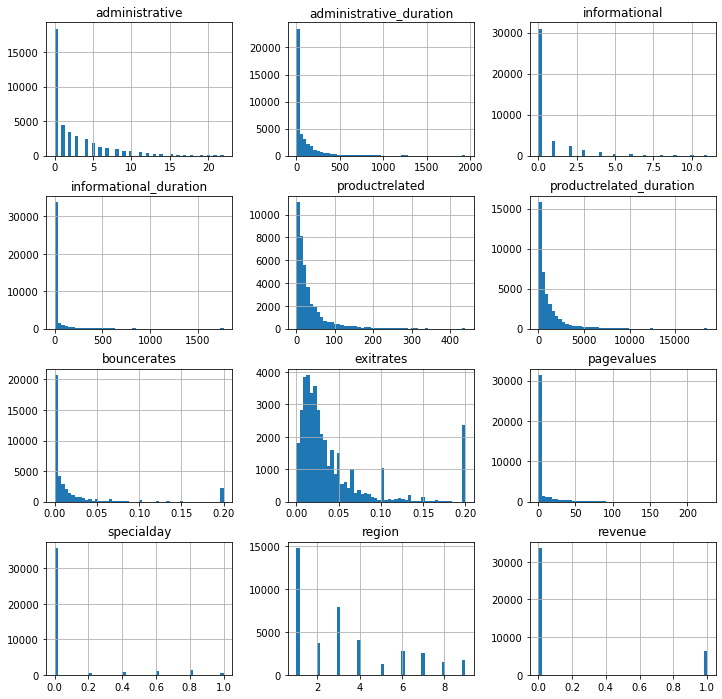

In [270]:
df_ecom_train_ds.hist(bins=50, figsize=(12,12))

In [271]:
df_ecom_train_ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
administrative,40000.0,2.544150,3.667252,0.0,0.000000,1.000000,4.000000,22.000000
administrative_duration,40000.0,89.794383,182.964645,0.0,0.000000,11.200000,110.154167,1946.000000
informational,40000.0,0.555225,1.332627,0.0,0.000000,0.000000,0.000000,11.000000
informational_duration,40000.0,40.977236,153.114387,0.0,0.000000,0.000000,0.000000,1767.666667
productrelated,40000.0,34.026975,46.798102,0.0,7.000000,19.000000,41.000000,440.000000
productrelated_duration,40000.0,1148.105672,1666.181462,0.0,183.883333,560.075000,1420.536667,18504.126210
bouncerates,40000.0,0.021969,0.048533,0.0,0.000000,0.003304,0.016667,0.200000
exitrates,40000.0,0.042307,0.048633,0.0,0.013389,0.025000,0.050000,0.200000
pagevalues,40000.0,6.494963,17.710646,0.0,0.000000,0.000000,0.000000,226.677702
specialday,40000.0,0.063553,0.199463,0.0,0.000000,0.000000,0.000000,1.000000


In [272]:
ecom_corr_matrix = df_ecom_train_ds.corr()

In [273]:
ecom_corr_matrix["revenue"].sort_values(ascending=False)

revenue                    1.000000
pagevalues                 0.507821
productrelated             0.184168
productrelated_duration    0.180542
administrative             0.153079
informational              0.111732
administrative_duration    0.108333
informational_duration     0.081428
weekend                    0.020203
region                    -0.010116
specialday                -0.078758
bouncerates               -0.145773
exitrates                 -0.193799
Name: revenue, dtype: float64

In [274]:
print("Number of records in data1 : ",df_ecom_train_ds.shape[0])
print("Number of features in data1 : ",df_ecom_train_ds.shape[1])

Number of records in data1 :  40000
Number of features in data1 :  18


In [275]:
df_ecom_train_ds.isnull().sum(axis = 1).sum()

0

In [276]:
# isolating the continuous variables 
num_var_list = list(df_ecom_train_ds.select_dtypes(exclude=['object']).drop(['revenue'],axis = 1).columns.values)
num_var_list

['administrative',
 'administrative_duration',
 'informational',
 'informational_duration',
 'productrelated',
 'productrelated_duration',
 'bouncerates',
 'exitrates',
 'pagevalues',
 'specialday',
 'region',
 'weekend']

In [277]:
# isolating the categorical variables 
cat_var_list = list(df_ecom_train_ds.select_dtypes(include=['object']).columns.values)
cat_var_list

['month', 'operatingsystems', 'browser', 'traffictype', 'visitortype']

In [278]:
def cat_plots(idat, col, target = "revenue"):
    print("Countplot for ",col, " split by ", target)
    print("\n")
    plt.figure(figsize=(15, 5))
    sns.countplot(x=col, data=df_ecom_train_ds, hue=target)
    plt.show()

Countplot for  month  split by  revenue




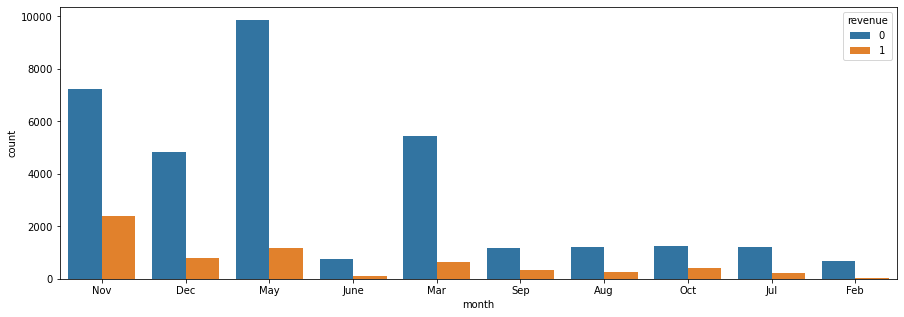

Countplot for  operatingsystems  split by  revenue




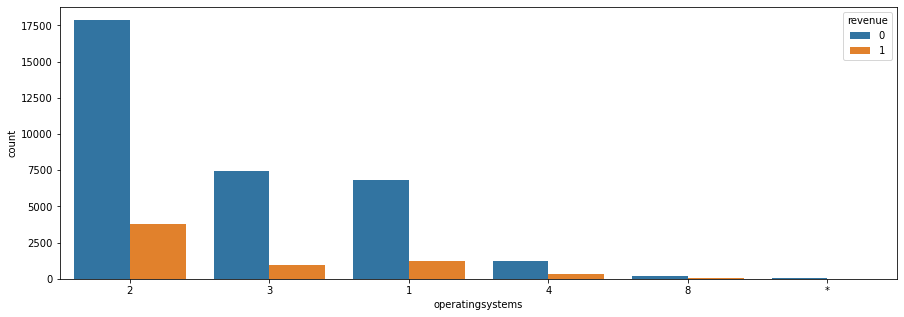

Countplot for  browser  split by  revenue




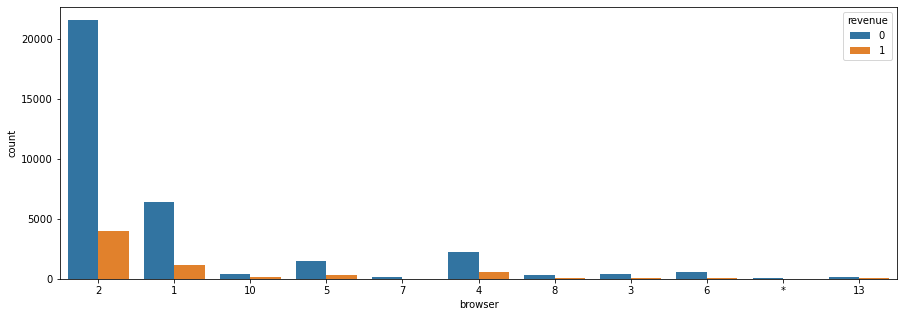

Countplot for  traffictype  split by  revenue




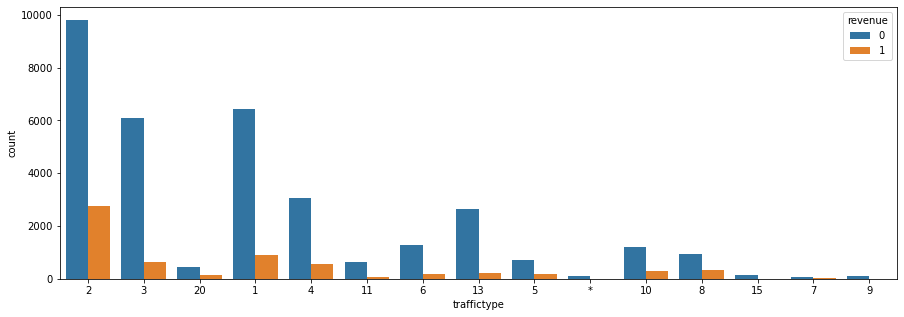

Countplot for  visitortype  split by  revenue




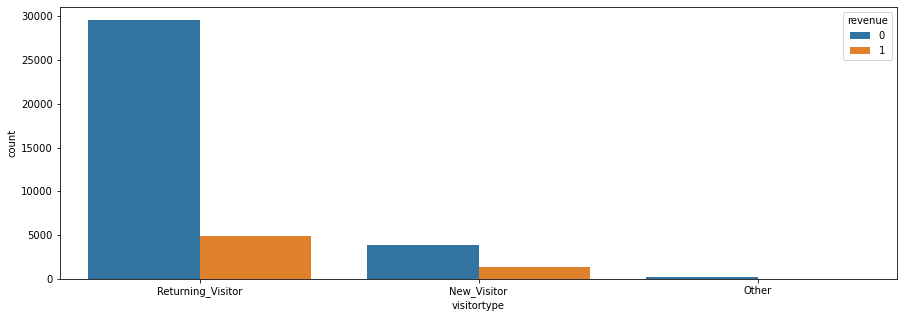

In [279]:
for cl in cat_var_list:
    cat_plots(df_ecom_train_ds,cl,"revenue")

In [280]:
def cont_plots(data, col, target):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    sns.distplot(data[col], ax=axes[0],kde_kws={'bw':0.15}).set_title("Distribution plot")
    sns.boxplot(x=target, y=col, data=df_ecom_train_ds).set_title("Box Plot distribution")
    plt.show()

<AxesSubplot:>

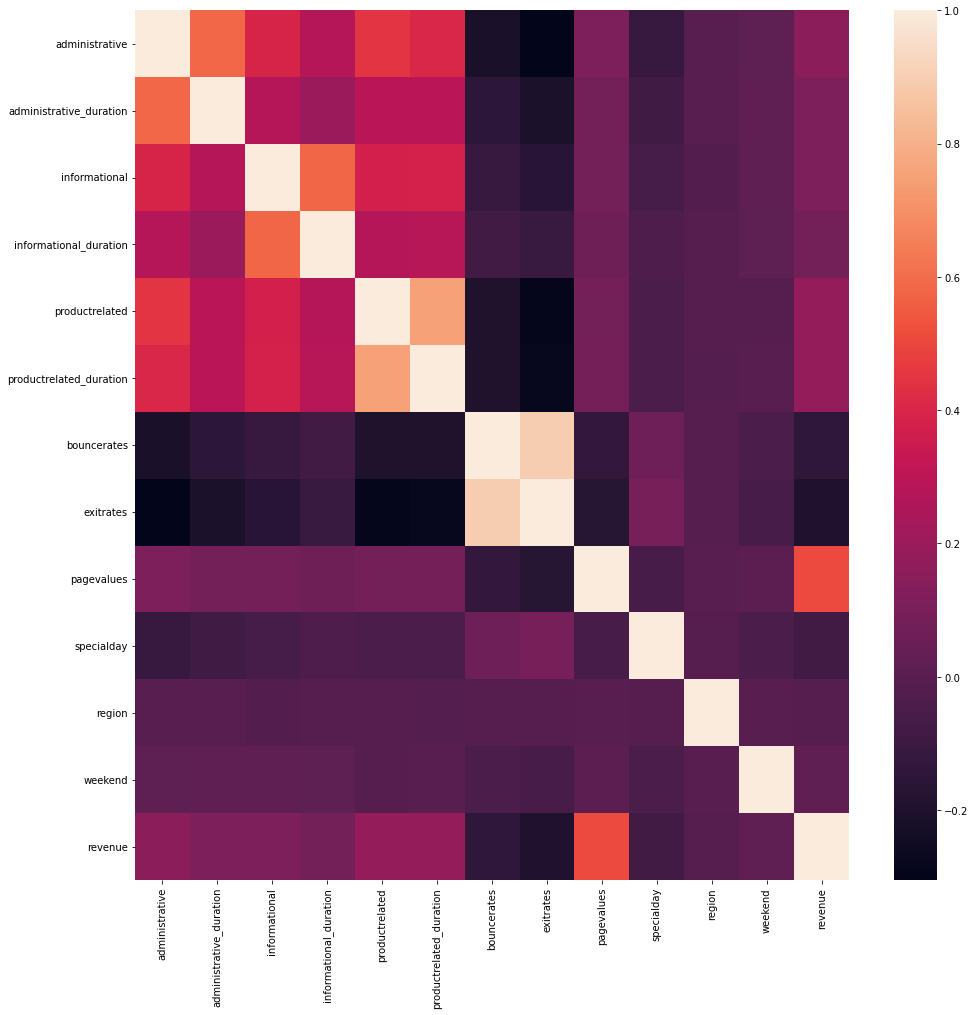

In [281]:
### Correlation heat map
f, ax = plt.subplots(figsize=(16,16))
corr = df_ecom_train_ds.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [282]:
## Imputing special values to 0s
df_ecom_train_ds_2 = df_ecom_train_ds.copy()
for col in num_var_list:
    df_ecom_train_ds_2[col]=np.where(df_ecom_train_ds[col] == '*',0,df_ecom_train_ds[col])

In [283]:
## Imputing special values to Mode
df_ecom_train_ds_2 = df_ecom_train_ds.copy()
for col in cat_var_list:
    if col == 'operatingsystems':
        df_ecom_train_ds_2[col]=np.where(df_ecom_train_ds[col] == '*',df_ecom_train_ds[col].mode(),df_ecom_train_ds[col])
    if col == 'browser':
        df_ecom_train_ds_2[col]=np.where(df_ecom_train_ds[col] == '*',df_ecom_train_ds[col].mode(),df_ecom_train_ds[col])
    if col == 'traffictype':
        df_ecom_train_ds_2[col]=np.where(df_ecom_train_ds[col] == '*',df_ecom_train_ds[col].mode(),df_ecom_train_ds[col])

In [284]:
df_ecom_train_ds_2[num_var_list].describe().T

,count,mean,std,min,25%,50%,75%,max
administrative,40000.0,2.544150,3.667252,0.0,0.000000,1.000000,4.000000,22.000000
administrative_duration,40000.0,89.794383,182.964645,0.0,0.000000,11.200000,110.154167,1946.000000
informational,40000.0,0.555225,1.332627,0.0,0.000000,0.000000,0.000000,11.000000
informational_duration,40000.0,40.977236,153.114387,0.0,0.000000,0.000000,0.000000,1767.666667
productrelated,40000.0,34.026975,46.798102,0.0,7.000000,19.000000,41.000000,440.000000
productrelated_duration,40000.0,1148.105672,1666.181462,0.0,183.883333,560.075000,1420.536667,18504.126210
bouncerates,40000.0,0.021969,0.048533,0.0,0.000000,0.003304,0.016667,0.200000
exitrates,40000.0,0.042307,0.048633,0.0,0.013389,0.025000,0.050000,0.200000
pagevalues,40000.0,6.494963,17.710646,0.0,0.000000,0.000000,0.000000,226.677702
specialday,40000.0,0.063553,0.199463,0.0,0.000000,0.000000,0.000000,1.000000


In [285]:
#Outlier Treatement 

df_ecom_train_ds_3 = df_ecom_train_ds_2.copy()
for col in df_ecom_train_ds_3:
        if (((df_ecom_train_ds_3[col].dtype)=='float64') | ((df_ecom_train_ds_3[col].dtype)=='int64')):
            print("capping the float64 / int64",col)
            percentiles = df_ecom_train_ds_3[col].quantile([0.01,0.99]).values
            df_ecom_train_ds_3[col][df_ecom_train_ds_3[col] <= percentiles[0]] = percentiles[0]
            df_ecom_train_ds_3[col][df_ecom_train_ds_3[col] >= percentiles[1]] = percentiles[1]
        else:
            print("capping the",col)
            df_ecom_train_ds_3[col]=df_ecom_train_ds_3[col]

capping the float64 / int64 administrative
capping the float64 / int64 administrative_duration
capping the float64 / int64 informational
capping the float64 / int64 informational_duration
capping the float64 / int64 productrelated
capping the float64 / int64 productrelated_duration
capping the float64 / int64 bouncerates
capping the float64 / int64 exitrates
capping the float64 / int64 pagevalues
capping the float64 / int64 specialday


/var/folders/5c/qnfs4jqx4xz1kjjw88f3d4k00000gn/T/ipykernel_11180/3049091443.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecom_train_ds_3[col][df_ecom_train_ds_3[col] <= percentiles[0]] = percentiles[0]
/var/folders/5c/qnfs4jqx4xz1kjjw88f3d4k00000gn/T/ipykernel_11180/3049091443.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecom_train_ds_3[col][df_ecom_train_ds_3[col] >= percentiles[1]] = percentiles[1]
/var/folders/5c/qnfs4jqx4xz1kjjw88f3d4k00000gn/T/ipykernel_11180/3049091443.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

capping the month
capping the operatingsystems
capping the browser
capping the float64 / int64 region
capping the traffictype
capping the visitortype
capping the weekend
capping the float64 / int64 revenue


/var/folders/5c/qnfs4jqx4xz1kjjw88f3d4k00000gn/T/ipykernel_11180/3049091443.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecom_train_ds_3[col][df_ecom_train_ds_3[col] >= percentiles[1]] = percentiles[1]
/var/folders/5c/qnfs4jqx4xz1kjjw88f3d4k00000gn/T/ipykernel_11180/3049091443.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecom_train_ds_3[col][df_ecom_train_ds_3[col] <= percentiles[0]] = percentiles[0]
/var/folders/5c/qnfs4jqx4xz1kjjw88f3d4k00000gn/T/ipykernel_11180/3049091443.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

In [286]:
df_ecom_train_ds_3[num_var_list].describe().T

,count,mean,std,min,25%,50%,75%,max
administrative,40000.0,2.514700,3.547478,0.000,0.000000,1.000000,4.000000,15.000000
administrative_duration,40000.0,85.697041,155.410080,0.000,0.000000,11.200000,110.154167,910.705000
informational,40000.0,0.535325,1.222759,0.000,0.000000,0.000000,0.000000,6.000000
informational_duration,40000.0,37.032721,121.227814,0.000,0.000000,0.000000,0.000000,814.608390
productrelated,40000.0,33.178825,41.696011,1.000,7.000000,19.000000,41.000000,229.000000
productrelated_duration,40000.0,1122.846472,1512.190409,0.000,183.883333,560.075000,1420.536667,8168.789720
bouncerates,40000.0,0.021969,0.048533,0.000,0.000000,0.003304,0.016667,0.200000
exitrates,40000.0,0.042315,0.048626,0.001,0.013389,0.025000,0.050000,0.200000
pagevalues,40000.0,6.150048,15.261080,0.000,0.000000,0.000000,0.000000,82.407773
specialday,40000.0,0.061678,0.191429,0.000,0.000000,0.000000,0.000000,0.800000


In [287]:
df_ecom_train_ds_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 139957 to 314094
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   administrative           40000 non-null  int64  
 1   administrative_duration  40000 non-null  float64
 2   informational            40000 non-null  int64  
 3   informational_duration   40000 non-null  float64
 4   productrelated           40000 non-null  int64  
 5   productrelated_duration  40000 non-null  float64
 6   bouncerates              40000 non-null  float64
 7   exitrates                40000 non-null  float64
 8   pagevalues               40000 non-null  float64
 9   specialday               40000 non-null  float64
 10  month                    40000 non-null  object 
 11  operatingsystems         40000 non-null  object 
 12  browser                  40000 non-null  object 
 13  region                   40000 non-null  int64  
 14  traffictype     

In [289]:
df_ecom_train_ds_3.head(10)

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
session_id,,,,,,,,,,,,,,,,,,
139957,2,47.500000,0,0.0,19,1203.480714,0.000000,0.027421,6.748509,0.0,Nov,2,2,3,2,Returning_Visitor,False,0
496587,0,0.000000,0,0.0,7,152.000000,0.000000,0.033333,0.000000,0.0,Dec,3,2,6,3,Returning_Visitor,False,0
440268,7,206.500000,1,389.9,95,4415.889952,0.000133,0.033750,2.676062,0.0,Nov,2,2,1,20,Returning_Visitor,False,0
294672,1,18.258571,0,0.0,103,8168.789720,0.004871,0.034746,6.824908,0.0,Nov,2,2,1,2,Returning_Visitor,True,1
497475,0,0.000000,0,0.0,42,1305.108333,0.016068,0.039742,0.000000,0.0,Dec,3,2,5,2,Returning_Visitor,False,0
271934,0,0.000000,0,0.0,26,1355.595434,0.009524,0.027597,7.507459,0.0,Dec,2,2,6,1,Returning_Visitor,False,0
347243,11,244.500000,2,746.5,138,3724.976548,0.000945,0.015264,49.537269,0.8,May,1,1,1,4,Returning_Visitor,True,0
386540,0,0.000000,0,0.0,4,0.000000,0.200000,0.200000,0.000000,0.0,May,2,2,3,1,Returning_Visitor,False,0
356153,0,0.000000,0,0.0,2,208.900000,0.000000,0.037142,0.000000,0.0,June,2,2,1,1,Returning_Visitor,False,0
